In [64]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.arima.model import ARIMA
import sqlite3
import warnings
warnings.filterwarnings("ignore")

# Step 1: Load and Inspect Your Data

In [3]:
# Load dataset 
df = pd.read_csv('simulated_investor_dataset.csv')

In [4]:
# Inspect the first few Rows 
df.head()

,investor_id,investor_name,investor_type,sector_fouce,check_size_usd,investment_stage,investment_frequency,geographic_focus,last_investment_date
0,1001,Miller-Clark,VC,Edtech,6637149,Seed,12,MENA,2024-05-28
1,1002,"Holmes, Arellano and Kim",Institutional Investor,AI,5770202,Seed,1,MENA,2025-03-16
2,1003,Stephens-Simmons,VC,Fintech,7183366,Series B,9,Europe,2024-11-30
3,1004,Robertson-Berg,VC,Healthtech,2853331,Series B,14,North America,2025-01-16
4,1005,"Lawrence, Moore and Huber",VC,Consumer Goods,7935478,Series C,15,North America,2024-12-26


In [5]:
# check general information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   investor_id           500 non-null    int64 
 1   investor_name         500 non-null    object
 2   investor_type         500 non-null    object
 3   sector_fouce          500 non-null    object
 4   check_size_usd        500 non-null    int64 
 5   investment_stage      500 non-null    object
 6   investment_frequency  500 non-null    int64 
 7   geographic_focus      500 non-null    object
 8   last_investment_date  500 non-null    object
dtypes: int64(3), object(6)
memory usage: 35.3+ KB


In [6]:
# statistical overview 
df.describe(include='all')

,investor_id,investor_name,investor_type,sector_fouce,check_size_usd,investment_stage,investment_frequency,geographic_focus,last_investment_date
count,500.000000,500,500,500,5.000000e+02,500,500.000000,500,500
unique,NaN,490,4,8,NaN,4,NaN,5,282
top,NaN,Miller PLC,VC,SaaS,NaN,Series C,NaN,Europe,2024-12-10
freq,NaN,2,136,79,NaN,134,NaN,116,5
mean,1250.500000,NaN,NaN,NaN,4.953943e+06,NaN,8.140000,NaN,NaN
std,144.481833,NaN,NaN,NaN,2.914046e+06,NaN,4.403997,NaN,NaN
min,1001.000000,NaN,NaN,NaN,1.025500e+05,NaN,1.000000,NaN,NaN
25%,1125.750000,NaN,NaN,NaN,2.405582e+06,NaN,4.000000,NaN,NaN
50%,1250.500000,NaN,NaN,NaN,4.945904e+06,NaN,8.000000,NaN,NaN
75%,1375.250000,NaN,NaN,NaN,7.446732e+06,NaN,12.000000,NaN,NaN


# 📌 Step 2: Data Cleaning and Preprocessing

In [8]:
# Check for missing data 
df.isnull().sum()

investor_id             0
investor_name           0
investor_type           0
sector_fouce            0
check_size_usd          0
investment_stage        0
investment_frequency    0
geographic_focus        0
last_investment_date    0
dtype: int64

In [9]:
# Validate categorical variable 
print(df['investor_type'].value_counts())
print(df['sector_fouce'].value_counts())

investor_type
VC                        136
Family Office             127
Institutional Investor    122
Private Equity            115
Name: count, dtype: int64
sector_fouce
SaaS              79
Edtech            76
E-commerce        74
AI                64
Healthtech        58
Consumer Goods    57
Fintech           49
Biotech           43
Name: count, dtype: int64


# 📌 Step 3: Exploratory Data Analysis (EDA)

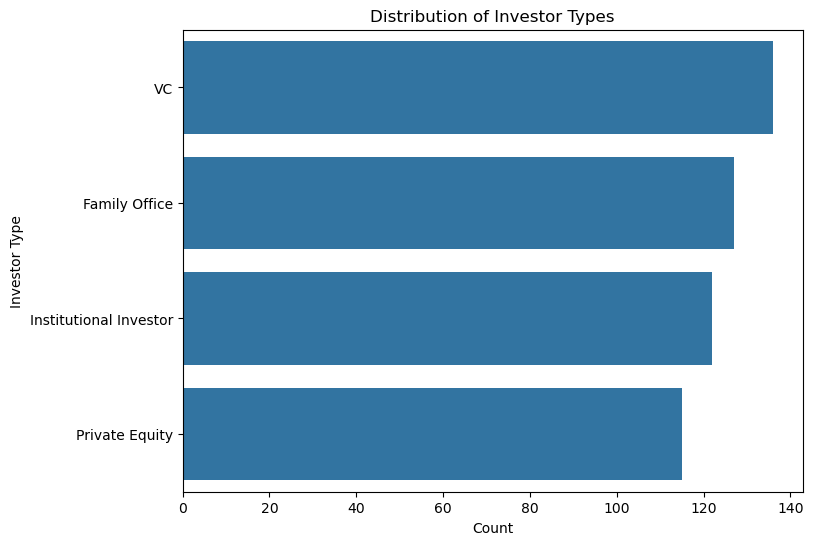

In [11]:
# Investment patterns by investor type 
plt.figure(figsize=(8,6))
sns.countplot(y='investor_type', data=df, order=df['investor_type'].value_counts().index)
plt.title('Distribution of Investor Types')
plt.xlabel('Count')
plt.ylabel('Investor Type')
plt.show()

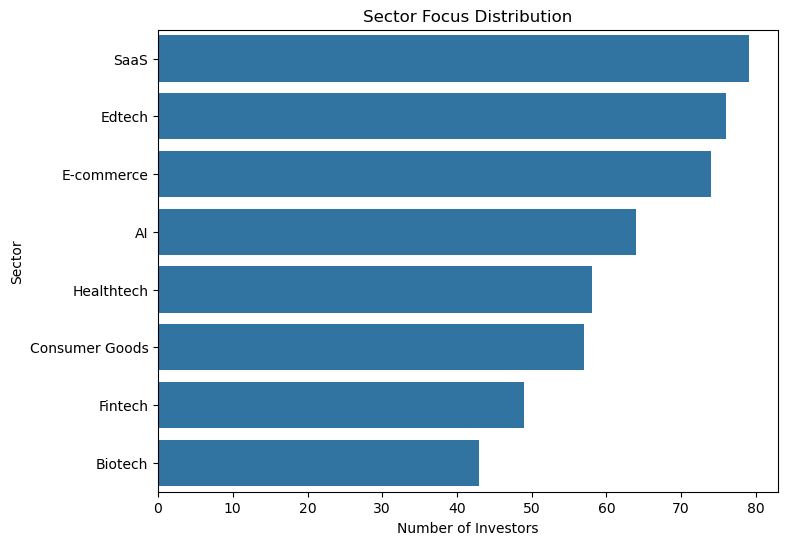

In [12]:
# Sector Fouce analysis 
plt.figure(figsize=(8,6))
sns.countplot(y='sector_fouce', data=df, order=df['sector_fouce'].value_counts().index)
plt.title('Sector Focus Distribution')
plt.xlabel('Number of Investors')
plt.ylabel('Sector')
plt.show()

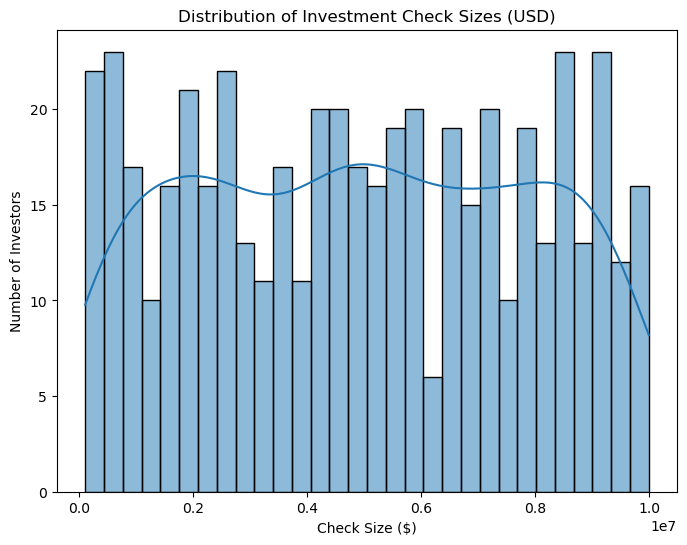

In [13]:
# Investment Check size analysis 
plt.figure(figsize=(8,6))
sns.histplot(df['check_size_usd'], bins=30, kde=True)
plt.title('Distribution of Investment Check Sizes (USD)')
plt.xlabel('Check Size ($)')
plt.ylabel('Number of Investors')
plt.show()

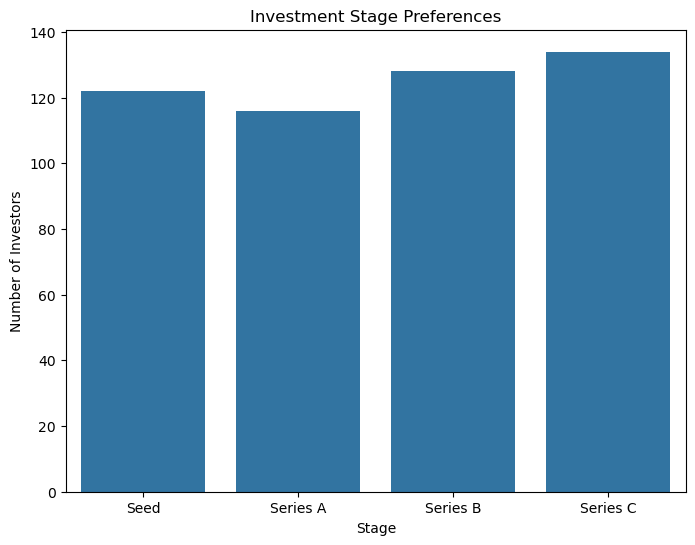

In [14]:
# Investment stage perferences 
plt.figure(figsize=(8,6))
sns.countplot(x='investment_stage', data=df, order=['Seed', 'Series A', 'Series B', 'Series C'])
plt.title('Investment Stage Preferences')
plt.xlabel('Stage')
plt.ylabel('Number of Investors')
plt.show()

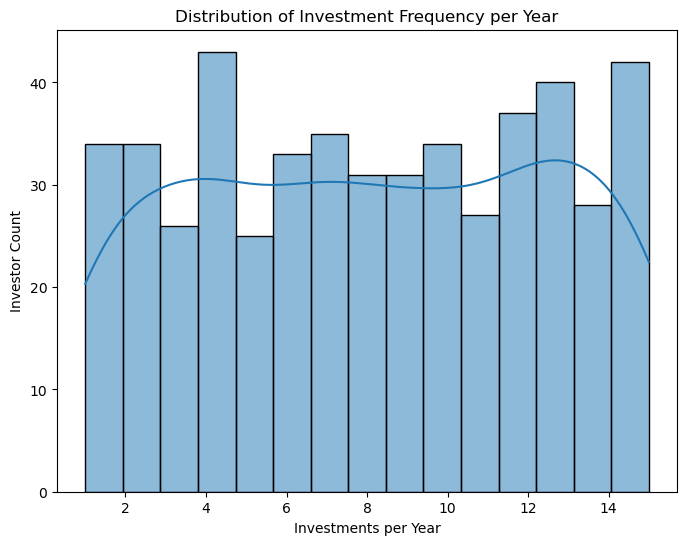

In [15]:
# Investment Frequency Distribution
plt.figure(figsize=(8,6))
sns.histplot(df['investment_frequency'], bins=15, kde=True)
plt.title('Distribution of Investment Frequency per Year')
plt.xlabel('Investments per Year')
plt.ylabel('Investor Count')
plt.show()

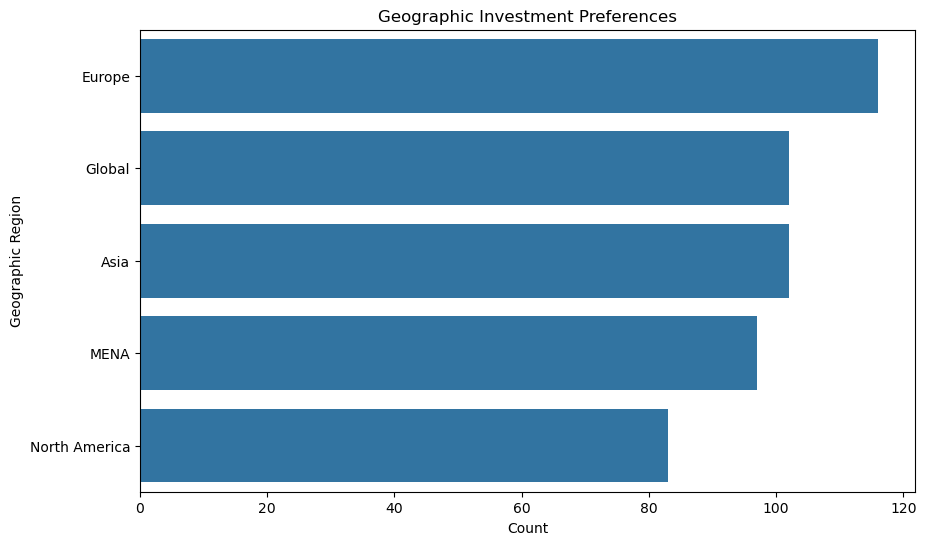

In [16]:
# Geographic Distribution Analysis
plt.figure(figsize=(10,6))
sns.countplot(y='geographic_focus', data=df, order=df['geographic_focus'].value_counts().index)
plt.title('Geographic Investment Preferences')
plt.xlabel('Count')
plt.ylabel('Geographic Region')
plt.show()

In [17]:
# Convert 'last_investment_date' to datetime 
df['last_investment_date'] = pd.to_datetime(df['last_investment_date'], errors='coerce')
# Confirm the column is converted correctly
print(df['last_investment_date'].dtype)

datetime64[ns]


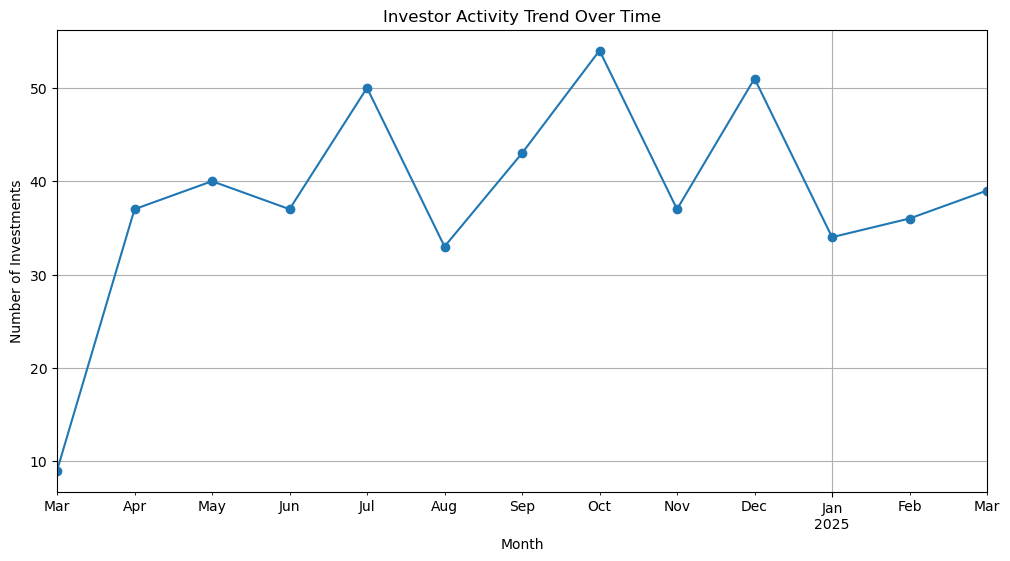

In [18]:
# Investments trends over months
df['investment_month'] = df['last_investment_date'].dt.to_period('M').dt.to_timestamp()
monthly_trends = df.groupby('investment_month').size()
plt.figure(figsize=(12,6))
monthly_trends.plot(marker='o')
plt.title('Investor Activity Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Investments')
plt.grid(True)
plt.show()

In [19]:
df.rename(columns={'sector_fouce': 'sector_focus'}, inplace=True)

# Investor Segmentation Using K-Means Clustering

## Prepare  Data for Clustering

In [22]:
# Selecting relevant features
features = ['investor_type', 'sector_focus', 'check_size_usd', 'investment_stage', 'investment_frequency', 'geographic_focus']
X = df[features]
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['check_size_usd', 'investment_frequency']),
        ('cat', OneHotEncoder(), ['investor_type', 'sector_focus', 'investment_stage', 'geographic_focus'])
    ])
X_processed = preprocessor.fit_transform(X)

## Step 2: Identify the Optimal Number of Clusters (Elbow Method)

  File "C:\Users\Pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


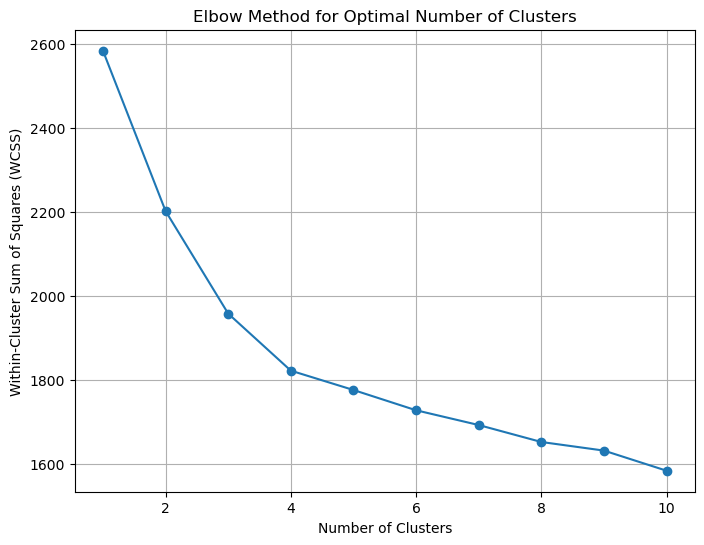

In [24]:
# Find optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)
# plot the elbow curve 
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

## Step 3: Apply K-Means Clustering Clearly

In [26]:
# Apply K-means clustering
optimal_clusters = 4  # adjust based on your elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_processed)

# Add the cluster labels to your original dataframe
df['Investor_Cluster'] = clusters

## Step 4: Interpret and Analyze Clusters

In [28]:
# Analyze cluster profiles
cluster_summary = df.groupby('Investor_Cluster').agg({
    'check_size_usd': 'mean',
    'investment_frequency': 'mean',
    'investor_type': lambda x: x.mode()[0],
    'sector_focus': lambda x: x.mode()[0],
    'investment_stage': lambda x: x.mode()[0],
    'geographic_focus': lambda x: x.mode()[0],
    'investor_id': 'count'
}).rename(columns={'investor_id': 'Number of Investors'})

print(cluster_summary)

                  check_size_usd  investment_frequency  \
Investor_Cluster                                         
0                   2.754832e+06              3.715447   
1                   7.363342e+06             12.261905   
2                   7.527069e+06              4.888000   
3                   2.138589e+06             11.563492   

                           investor_type    sector_focus investment_stage  \
Investor_Cluster                                                            
0                         Private Equity            SaaS             Seed   
1                                     VC          Edtech         Series A   
2                                     VC      E-commerce         Series C   
3                 Institutional Investor  Consumer Goods         Series B   

                 geographic_focus  Number of Investors  
Investor_Cluster                                        
0                          Europe                  123  
1                

## Step 5: Visualize Investor Clusters Clearly

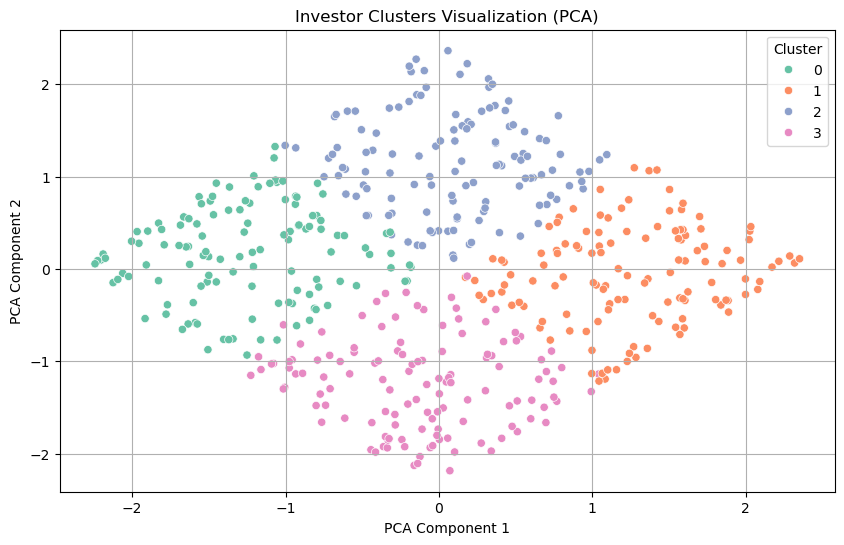

In [30]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, "toarray") else X_processed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set2')
plt.title('Investor Clusters Visualization (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 📈 Investor Trend Analysis (Time-Series Analysis and Forecasting)

## Step 1: Aggregate Data by Time

In [33]:
# Ensure your 'investment_month' column exists and is datetime type
df['investment_month'] = pd.to_datetime(df['last_investment_date']).dt.to_period('M').dt.to_timestamp()

# Count investments per month
monthly_investments = df.groupby('investment_month').size().reset_index(name='number_of_investments')

# View aggregated data
print(monthly_investments.head())

  investment_month  number_of_investments
0       2024-03-01                      9
1       2024-04-01                     37
2       2024-05-01                     40
3       2024-06-01                     37
4       2024-07-01                     50


# Step 2: Visualize Historical Trends

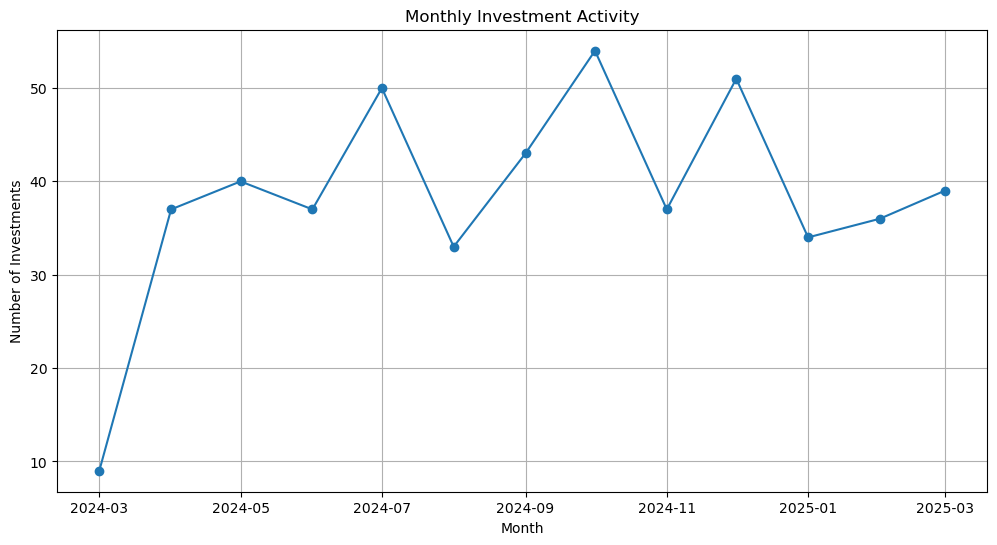

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_investments['investment_month'], monthly_investments['number_of_investments'], marker='o')
plt.title('Monthly Investment Activity')
plt.xlabel('Month')
plt.ylabel('Number of Investments')
plt.grid(True)
plt.show()

## Step 3: Forecast Investor Activity (ARIMA)

                                 SARIMAX Results                                 
Dep. Variable:     number_of_investments   No. Observations:                   13
Model:                    ARIMA(1, 1, 1)   Log Likelihood                 -46.595
Date:                   Fri, 28 Mar 2025   AIC                             99.191
Time:                           05:21:38   BIC                            100.646
Sample:                       03-01-2024   HQIC                            98.652
                            - 03-01-2025                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4079      0.473     -0.862      0.389      -1.335       0.520
ma.L1         -0.3270      0.658     -0.497      0.619      -1.616       0.962
sigma2       131.9640     69

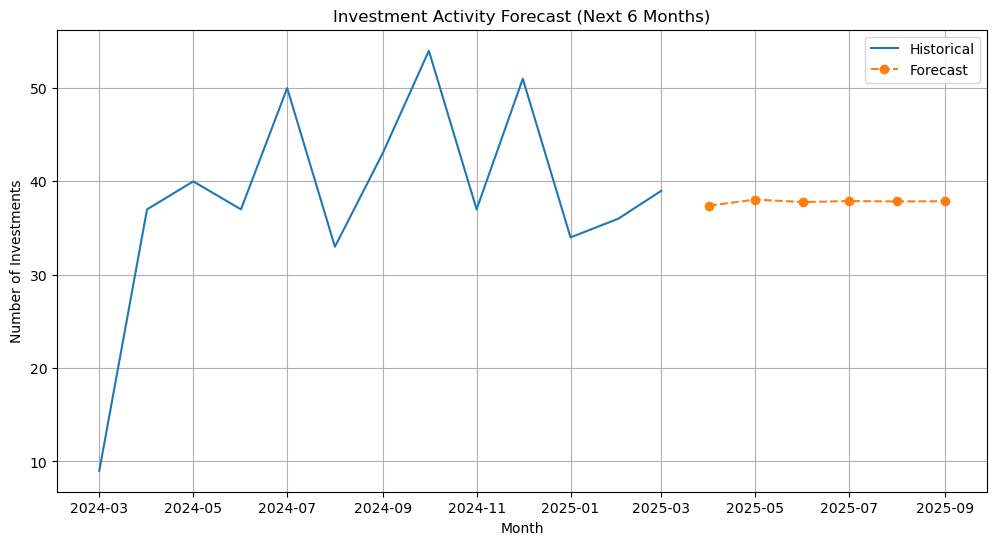

In [37]:
# Set the 'investment_month' as index
monthly_investments.set_index('investment_month', inplace=True)

# Define and fit ARIMA model (using simple parameters initially)
model = ARIMA(monthly_investments, order=(1, 1, 1))  # ARIMA(p,d,q)
model_fit = model.fit()

# Summary of model fit
print(model_fit.summary())

# Forecast next 6 months
forecast_steps = 6
forecast = model_fit.forecast(steps=forecast_steps)

# Visualize forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_investments.index, monthly_investments['number_of_investments'], label='Historical')
plt.plot(pd.date_range(start=monthly_investments.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS'), forecast, label='Forecast', marker='o', linestyle='--')
plt.title('Investment Activity Forecast (Next 6 Months)')
plt.xlabel('Month')
plt.ylabel('Number of Investments')
plt.legend()
plt.grid(True)
plt.show()

# 🚩 Overall Interpretation :
### The AR and MA terms aren't statistically significant; however, that's common with limited data (only 13 months).

### Despite this, diagnostic checks (normality, autocorrelation, heteroskedasticity) are good.

### The model is acceptable for illustrative forecasting, though results should be treated cautiously due to limited data.



In [66]:
# Connect to SQLite database (creates the database file automatically)
conn = sqlite3.connect('investor_crm.db')
cursor = conn.cursor()

# Create investor table clearly
cursor.execute('''
CREATE TABLE IF NOT EXISTS investors (
    investor_id INTEGER PRIMARY KEY,
    investor_name TEXT,
    investor_type TEXT,
    sector_focus TEXT,
    check_size_usd INTEGER,
    investment_stage TEXT,
    investment_frequency INTEGER,
    geographic_focus TEXT,
    last_investment_date TEXT
)
''')

conn.commit()

In [68]:
# Insert DataFrame into the SQLite database clearly
df.to_sql('investors', conn, if_exists='replace', index=False)

# Check if data was inserted correctly
cursor.execute('SELECT * FROM investors LIMIT 5')
rows = cursor.fetchall()

for row in rows:
    print(row)

(1001, 'Miller-Clark', 'VC', 'Edtech', 6637149, 'Seed', 12, 'MENA', '2024-05-28 00:00:00', '2024-05-01 00:00:00', 1)
(1002, 'Holmes, Arellano and Kim', 'Institutional Investor', 'AI', 5770202, 'Seed', 1, 'MENA', '2025-03-16 00:00:00', '2025-03-01 00:00:00', 2)
(1003, 'Stephens-Simmons', 'VC', 'Fintech', 7183366, 'Series B', 9, 'Europe', '2024-11-30 00:00:00', '2024-11-01 00:00:00', 1)
(1004, 'Robertson-Berg', 'VC', 'Healthtech', 2853331, 'Series B', 14, 'North America', '2025-01-16 00:00:00', '2025-01-01 00:00:00', 3)
(1005, 'Lawrence, Moore and Huber', 'VC', 'Consumer Goods', 7935478, 'Series C', 15, 'North America', '2024-12-26 00:00:00', '2024-12-01 00:00:00', 1)


## 🟢 (A) Query Investors by Criteria

In [71]:
sector = 'Fintech'
stage = 'Series A'

cursor.execute('''
SELECT investor_name, investor_type, check_size_usd, geographic_focus
FROM investors
WHERE sector_focus=? AND investment_stage=?
''', (sector, stage))

result = cursor.fetchall()

print("Fintech Series A Investors:")
for investor in result:
    print(investor)

Fintech Series A Investors:
('Ford LLC', 'Private Equity', 1284141, 'Asia')
('Collins-Carr', 'Institutional Investor', 3017857, 'Europe')
('Wright Inc', 'Institutional Investor', 1838857, 'Europe')
('Castro Ltd', 'Family Office', 4289409, 'Global')
('Henry-Woods', 'Family Office', 7896593, 'Europe')
('Santos, Cox and Riley', 'VC', 2704446, 'Asia')
('Frazier LLC', 'VC', 9044629, 'Global')
('Keller, Young and Griffin', 'Institutional Investor', 4104401, 'MENA')
('Lowery PLC', 'Private Equity', 5602146, 'Global')
('Gray, Jackson and Newman', 'Private Equity', 3030356, 'Global')
('Romero-Barajas', 'VC', 9124378, 'Europe')


## 🟢 (B) Update Investor Information

In [74]:
investor_id = 1005  # Example ID
new_check_size = 2000000  # New check size ($2M)

cursor.execute('''
UPDATE investors
SET check_size_usd = ?
WHERE investor_id = ?
''', (new_check_size, investor_id))

conn.commit()

# Verify update clearly
cursor.execute('SELECT investor_name, check_size_usd FROM investors WHERE investor_id=?', (investor_id,))
print(cursor.fetchone())

('Lawrence, Moore and Huber', 2000000)


## 🟢 (C) Add a New Investor Record

In [77]:
new_investor = (1501, 'New Wave Capital', 'VC', 'AI', 5000000, 'Series B', 7, 'Europe', '2025-03-28')

cursor.execute('''
INSERT INTO investors (investor_id, investor_name, investor_type, sector_focus, check_size_usd, investment_stage, investment_frequency, geographic_focus, last_investment_date)
VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?)
''', new_investor)

conn.commit()

# Confirm the new record
cursor.execute('SELECT * FROM investors WHERE investor_id=1501')
print(cursor.fetchone())

(1501, 'New Wave Capital', 'VC', 'AI', 5000000, 'Series B', 7, 'Europe', '2025-03-28', None, None)


## 🟢 (D) Delete an Investor Record

In [80]:
delete_id = 1501  # ID of investor to delete

cursor.execute('DELETE FROM investors WHERE investor_id=?', (delete_id,))
conn.commit()

# Verify deletion clearly
cursor.execute('SELECT * FROM investors WHERE investor_id=?', (delete_id,))
print(cursor.fetchone())  # Should return None

None


In [82]:
conn.close()